In [70]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#read csv file
df = pd.read_csv('data/probar.csv', header=None)
#table dimensions
col_count = df.shape[1]
#add column names
for i in range(col_count-1):
    df.rename(columns={i: 'X'+str(i)}, inplace=True)
df.rename(columns={col_count-1: 'Class'}, inplace=True)

#encode all columns except the last one
'''
le = LabelEncoder()
for i in range(col_count-1):
    df['X'+str(i)] = le.fit_transform(df['X'+str(i)])
'''
    




"\nle = LabelEncoder()\nfor i in range(col_count-1):\n    df['X'+str(i)] = le.fit_transform(df['X'+str(i)])\n"

# Dataset etiquetado

In [72]:
#Dataset completo
df

,X0,X1,X2,Class
0,0,0,1,1
1,0,1,0,2
2,0,1,1,3
3,1,0,0,4
4,1,0,1,5
5,1,1,0,6
6,1,1,1,7


In [73]:
#Set de entrenamiento serán los primeros 10 registros
#Set de prueba serán los últimos 5
df_train = df.iloc[0:6]
df_test = df.iloc[6:]

#### Dataset entrenamiento


In [74]:
#Dataset de entrenamiento
df_train

,X0,X1,X2,Class
0,0,0,1,1
1,0,1,0,2
2,0,1,1,3
3,1,0,0,4
4,1,0,1,5
5,1,1,0,6


#### Dataset prueba

In [75]:
#Dataset de prueba
df_test

,X0,X1,X2,Class
6,1,1,1,7


Pesos de prueba generados de forma aleatoria de acuerdo a la cantidad de características del dataset

Aleatorios desde 0 hasta 1

In [76]:
#
#Set the weights and bias randomly (between 0 and 1)
w =[round(np.random.rand(),2) for x in range(col_count-1)]   
b = round(np.random.rand(),2)

w[0]= 0.84
w[1]= 0.394
w[2]= 0.783

b = 0
#learning rate
lr = 0.3
for i in range(col_count-1):
    print('w'+str(i)+' = '+str(w[i]))

print('b = '+str(b))


w0 = 0.84
w1 = 0.394
w2 = 0.783
b = 0


In [77]:
def func_sum(x)->int:
    '''Funcion de suma'''
    return np.dot(x,w)+b


### Entrenamiento

In [78]:
#Training
mse_list = []

glob_error = []
for i in range(10):
    change = False
    for j in range(df_train.shape[0]):
        x = df_train.iloc[j,:-1]
        y = df_train.iloc[j,-1]
        y_hat = func_sum(x)
        #MSE
        mse = (y - y_hat)**2
        print('MSE = '+str(mse))
        mse_list.append(mse)
        #calcular error
        error = y - y_hat
        #actualizar pesos
        for k in range(col_count-1):
            w[k] = w[k] + lr * error * x[k]
            #imprimir pesos
            print('w'+str(k)+' = '+str(w[k]))

    glob_error.append(np.mean(mse_list))

        




MSE = 0.047088999999999985
w0 = 0.84
w1 = 0.394
w2 = 0.8481000000000001
MSE = 2.5792359999999994
w0 = 0.84
w1 = 0.8757999999999999
w2 = 0.8481000000000001
MSE = 1.62843121
w0 = 0.84
w1 = 1.25863
w2 = 1.23093
MSE = 9.985600000000002
w0 = 1.7879999999999998
w1 = 1.25863
w2 = 1.23093
MSE = 3.9246383448999995
w0 = 2.3823209999999997
w1 = 1.25863
w2 = 1.8252510000000002
MSE = 5.565112184401003
w0 = 3.0900356999999996
w1 = 1.9663447
w2 = 1.8252510000000002
MSE = 0.6810392130010003
w0 = 3.0900356999999996
w1 = 1.9663447
w2 = 1.5776757000000001
MSE = 0.0011326792180899963
w0 = 3.0900356999999996
w1 = 1.9764412900000001
w2 = 1.5776757000000001
MSE = 0.3070456386066604
w0 = 3.0900356999999996
w1 = 1.810206193
w2 = 1.411440603
MSE = 0.8280350272744907
w0 = 3.3630249899999995
w1 = 1.810206193
w2 = 1.411440603
MSE = 0.05086576874084187
w0 = 3.4306853120999996
w1 = 1.810206193
w2 = 1.4791009251
MSE = 0.576245707029344
w0 = 3.6584178605699997
w1 = 2.03793874147
w2 = 1.4791009251
MSE = 0.2295376964316

#### Pesos finales

In [79]:
#Best weights and bias
print('Mejores pesos y umbral')
for i in range(col_count-1):
    print('w'+str(i)+' = '+str(w[i]))

print('b = '+str(b))


Mejores pesos y umbral
w0 = 3.9997437670936398
w1 = 1.9997235138992029
w2 = 1.000911426996237
b = 0


#### Clasificamos el dataset de prueba

In [80]:
#Testing creating a new column with the predicted values
aux_df = df_test.copy()
aux_df['Predicted'] = aux_df.apply(lambda x: func_sum(x[:-1]), axis=1)
df_test = aux_df

df_test


,X0,X1,X2,Class,Predicted
6,1,1,1,7,7.000379


#### Gráfica error cuadrático medio

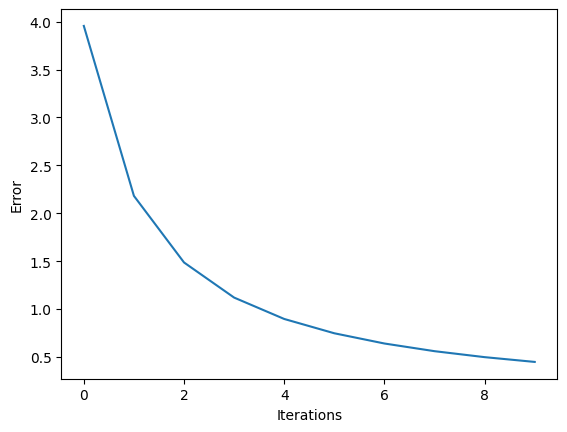

In [81]:
#Global error
plt.plot(glob_error)
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.show()
